# **CS210 - Introduction to Data Science**
## **Homework 2**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for the homework.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs210_hw2_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

You will use ChatGPT **3.5** to write your code. For each part, send a prompt to ChatGPT for the task. You can use the initial prompt OR use additional prompts to correct / guide GPT. Copy the code generated by GPT to this notebook and run it here.

❗ **You will share your chat history, so use the same chat for ALL your prompts.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS210-HW2.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [2]:
penguins_df = pd.read_csv("cs210_hw2_dataset.csv")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,adult,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,NaN,fish,adult,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,NaN,adult,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0


## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [3]:
shape = penguins_df.shape
variables = penguins_df.columns
print("Shape of the dataset: ", shape)
print("Variables of the dataset: ", list(variables))
penguins_df.info()
penguins_df.head()

Shape of the dataset:  (3430, 11)
Variables of the dataset:  ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage', 'health_metrics', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), object(6)
memory usage: 294.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,adult,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,NaN,fish,adult,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,NaN,adult,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0


In [4]:
# Fill the missing values

# Mode for categorical variables
penguins_df["island"].fillna(penguins_df["island"].mode()[0], inplace=True)
penguins_df["sex"].fillna(penguins_df["sex"].mode()[0], inplace=True)
penguins_df["diet"].fillna(penguins_df["diet"].mode()[0], inplace=True)
penguins_df["life_stage"].fillna(penguins_df["life_stage"].mode()[0], inplace=True)

# Mean for numerical variables
penguins_df["bill_length_mm"].fillna(int(penguins_df["bill_length_mm"].mean()), inplace=True)
penguins_df["bill_depth_mm"].fillna(int(penguins_df["bill_depth_mm"].mean()), inplace=True)
penguins_df["flipper_length_mm"].fillna(int(penguins_df["flipper_length_mm"].mean()), inplace=True)
penguins_df["body_mass_g"].fillna(int(penguins_df["body_mass_g"].mean()), inplace=True)

In [5]:
sex_map = {'female': 1, 'male': 0}
island_map = {'Biscoe': 1, 'Dream': 2, 'Torgensen': 3}
diet_map = {'fish': 1, 'krill': 2, 'squid': 3, "parental":4}
life_stage_map = {'chick': 1, 'juvenile': 2, 'adult': 3}
health_metrics_map = {'healthy': 1, 'overweight': 2, 'underweight': 3}
species_map = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}

# Encode the categorical variables using the mapping dictionaries
penguins_df.replace(species_map | sex_map | island_map | diet_map | life_stage_map | health_metrics_map, inplace=True)

penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,1.0,1,53.4,17.8,219.0,5687.0,1,1,2,2,2021.0
1,1.0,1,49.3,18.1,245.0,4825.0,1,1,3,2,2021.0
2,1.0,1,55.7,16.6,226.0,5388.0,1,1,3,2,2021.0
3,1.0,1,38.0,15.6,221.0,6262.0,1,2,3,2,2021.0
4,1.0,1,60.7,17.9,177.0,4811.0,1,1,2,2,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
3425,3.0,1,44.0,20.4,252.0,4825.0,0,2,3,1,2025.0
3426,3.0,1,54.5,25.2,245.0,6872.0,1,3,2,1,2025.0
3427,3.0,1,51.4,20.4,258.0,4825.0,0,3,3,2,2025.0
3428,3.0,1,55.9,20.5,247.0,4825.0,0,3,3,1,2025.0


## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the dataset
penguins_df = shuffle(penguins_df)
# Separate the features and the target variable
X = penguins_df.drop(columns=["health_metrics"], axis=1)
y = penguins_df["health_metrics"]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


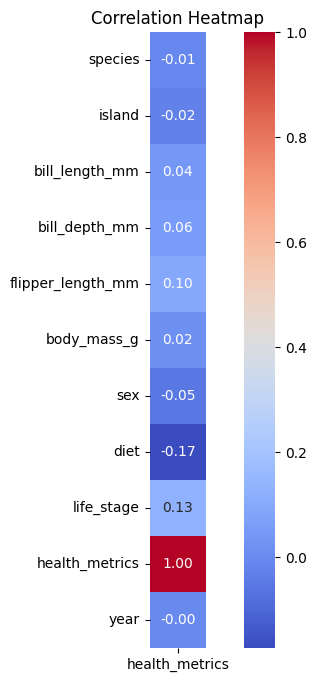

In [7]:
# Calculate correlations
correlations = penguins_df.corr()[['health_metrics']]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

**You can write your answers to (4.1) here.**
----
----  
**Feature Selection:** Flipper Length has a correlatioın of 0.13 and Diet has a correlation of -0.17 with the target variable. These are the _relatively_ strong correlations with the target variable.  

**Hyphothetical Driver Features:** The first hypothetical feature is a version of _BMI (Body Mass Index)_ which is calculated by dividing the body mass by the square of the flipper length. The second hypothetical feature is the _Diet Preference Index_ which is calculated by measuring the standard deviation of body mass for each diet type relative to the average body mass. Penguins with higher indices might show more varied body mass changes, indicating a stronger preference or adaptation to a particular diet.

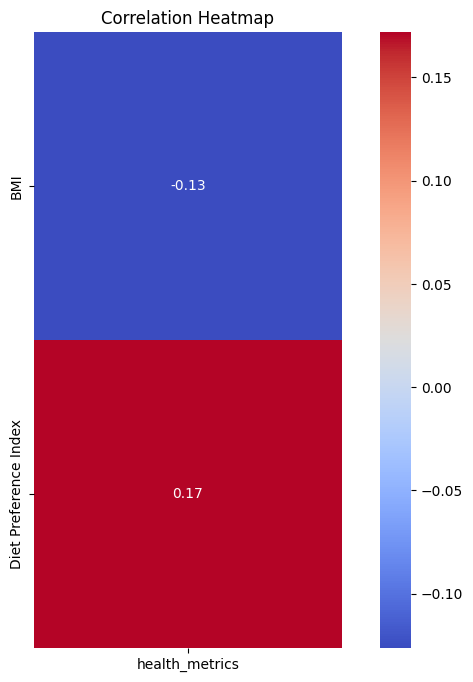

In [8]:
penguins_df["BMI"] = penguins_df["body_mass_g"] / (penguins_df["flipper_length_mm"] * penguins_df["flipper_length_mm"])

diet_preference_index = {}
# Iterate through each unique diet type
unique_diets = penguins_df['diet'].unique()
for diet_type in unique_diets:
    # Calculate the average body mass for each diet type
    avg_body_mass = penguins_df[penguins_df['diet'] == diet_type]["body_mass_g"].mean()
    # Calculate the standard deviation of body mass for each diet type
    std_body_mass = penguins_df[penguins_df['diet'] == diet_type]["body_mass_g"].std()
    # Calculating preference index based on deviation from the overall average body mass
    preference_index = std_body_mass / avg_body_mass
    # Assign preference index to the diet type
    diet_preference_index[diet_type] = preference_index

# Map the calculated indices to each penguin's diet in a new column 'Diet Preference Index'
penguins_df['Diet Preference Index'] = penguins_df['diet'].map(diet_preference_index)


corr = penguins_df.corr()[["health_metrics"]].iloc[-2:, :]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Do a grid search 10 times
for _ in range(20):
    # Create a decision tree classifier instance
    dt_classifier = DecisionTreeClassifier()

    # Define the hyperparameters to tune
    parameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.append(np.linspace(1, 30, 30, endpoint=True, dtype=int), None),
    }

    # Split train data into train and validation sets
    X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(dt_classifier, parameters, cv=5, scoring='accuracy').fit(X_train_s, y_train_s)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters: {best_params}")
    # Predict on the validation set
    y_pred = grid_search.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print("Validation accuracy: ", accuracy, "\n")

Best Parameters: {'criterion': 'entropy', 'max_depth': 26}
Validation accuracy:  0.8218181818181818 

Best Parameters: {'criterion': 'entropy', 'max_depth': 22}
Validation accuracy:  0.8327272727272728 

Best Parameters: {'criterion': 'entropy', 'max_depth': 20}
Validation accuracy:  0.8472727272727273 

Best Parameters: {'criterion': 'entropy', 'max_depth': 9}
Validation accuracy:  0.8727272727272727 

Best Parameters: {'criterion': 'entropy', 'max_depth': 11}
Validation accuracy:  0.8363636363636363 

Best Parameters: {'criterion': 'entropy', 'max_depth': 18}
Validation accuracy:  0.8254545454545454 

Best Parameters: {'criterion': 'entropy', 'max_depth': 16}
Validation accuracy:  0.84 

Best Parameters: {'criterion': 'entropy', 'max_depth': 20}
Validation accuracy:  0.7890909090909091 

Best Parameters: {'criterion': 'entropy', 'max_depth': 14}
Validation accuracy:  0.8363636363636363 

Best Parameters: {'criterion': 'entropy', 'max_depth': 27}
Validation accuracy:  0.82545454545454

**Criterion:** The criterion hyperparameter determines the function to measure the quality of a split. The two options are _Gini Impurity_ and _Entropy_. I chose to tune this hyperparameter because it determines the quality of the splits and thus the overall accuracy of the model.  
    - It is relatively faster to compute compared to entropy and is the default criterion in scikit-learn's decision tree classifier.  
    - Entropy tends to create more balanced splits in the tree and is sensitive to the number of unique classes present. It may work well in scenarios where the classes are well balanced or when dealing with multi-class classification problems.  

**Max Depth:** The max depth hyperparameter determines the maximum depth of the tree. I chose to tune this hyperparameter because it determines the depth of the tree and thus the complexity of the model. It is also a good way to prevent overfitting.   

The validation tests reuslts with a better accuracy for hyperparameters are shown below.  
**Criterion:** Entropy  
**Max Depth:** 18 

## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [10]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=18
)
dt_classifier = dt_classifier.fit(X_train, y_train)

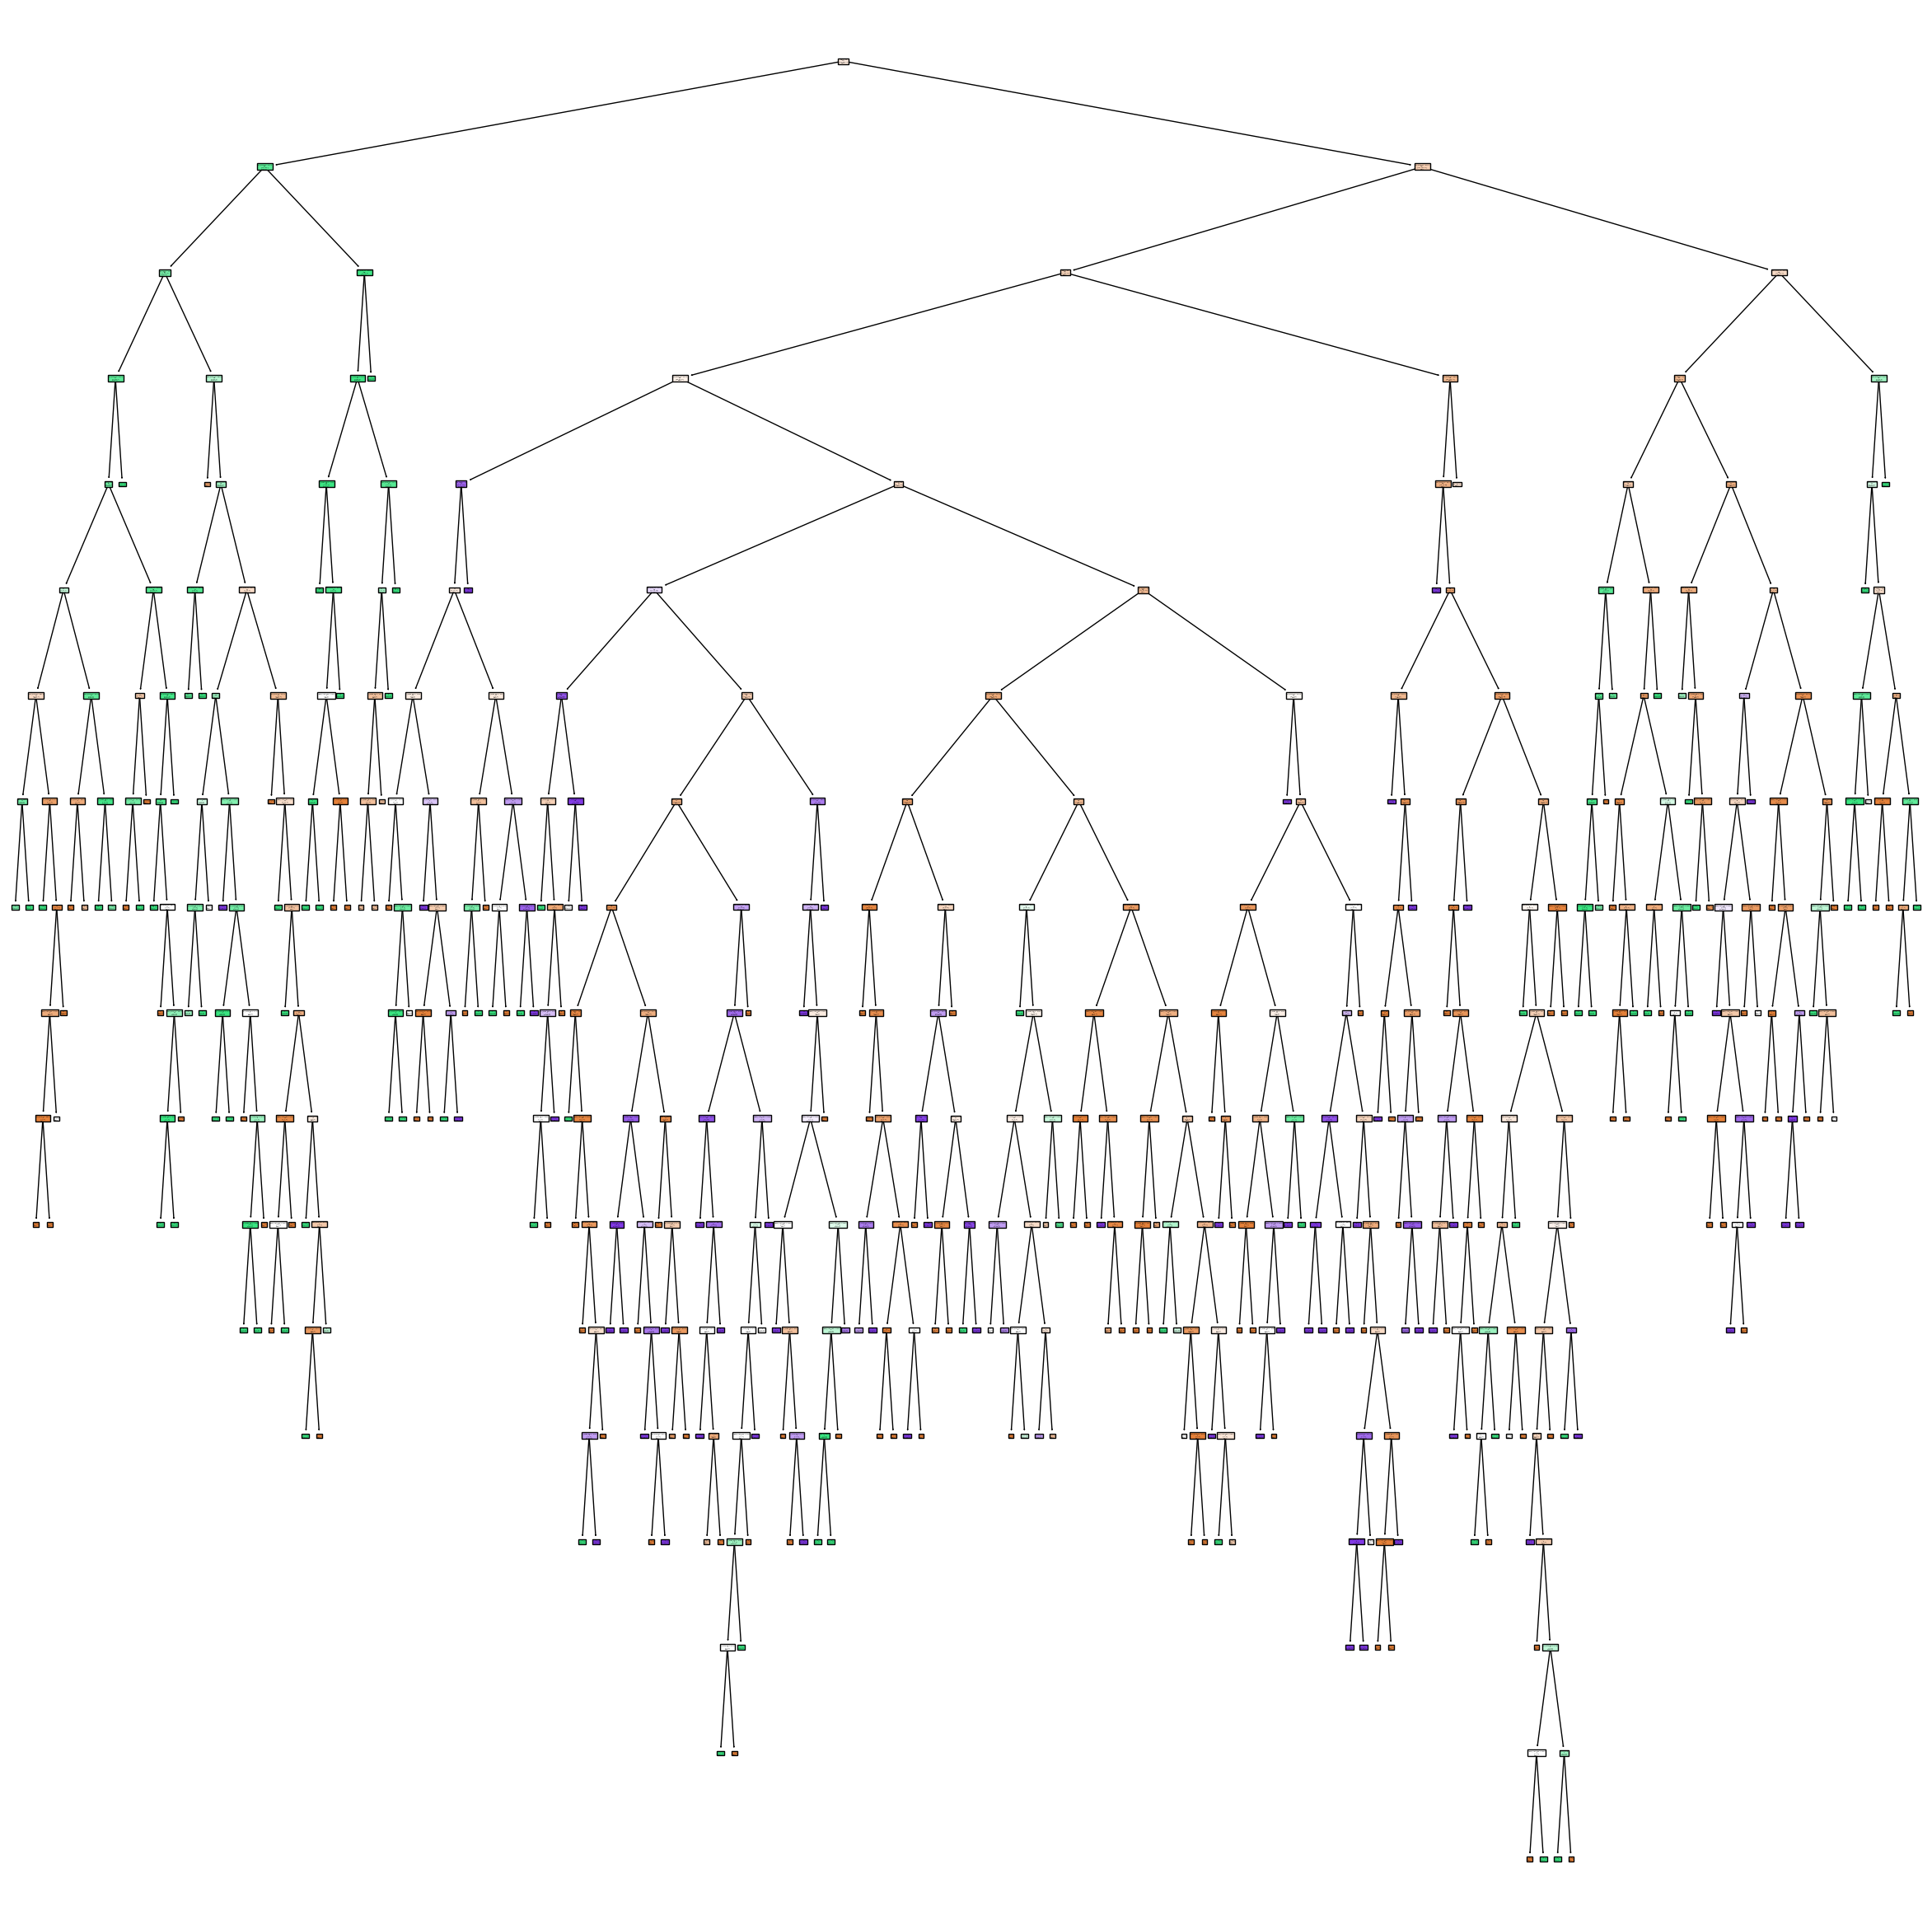

In [11]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 30))
_ = plot_tree(dt_classifier, feature_names=X.columns, class_names=['healthy', 'overweight', 'underweight'], filled=True, label="none", impurity=False, ax=ax)
plt.show()

## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [12]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

Test accuracy:  0.8294460641399417


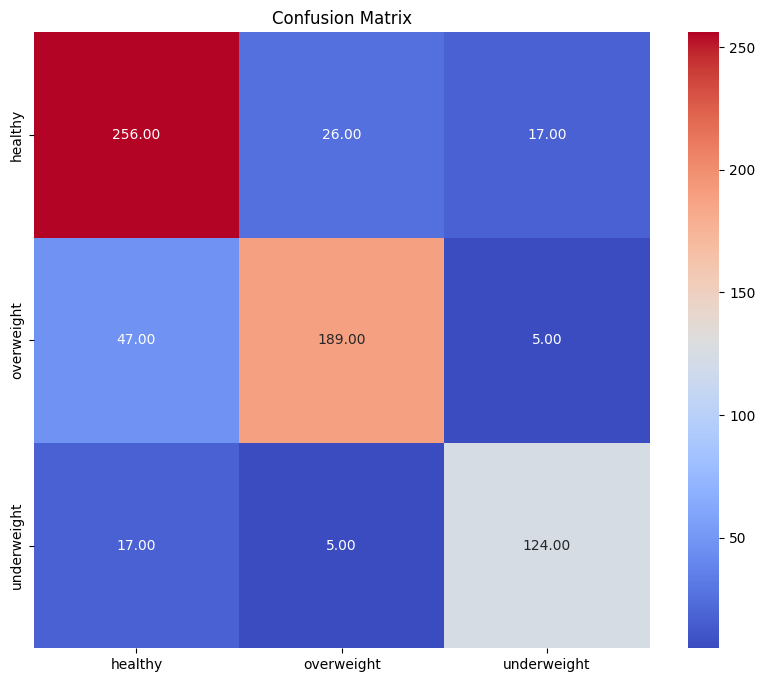

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
labels = ['healthy', 'overweight', 'underweight']
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', square=True, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.show()

**Fill the blanks:** The model most frequently mistakes class(es) **_healthy_** for class(es) **_overweight_**.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
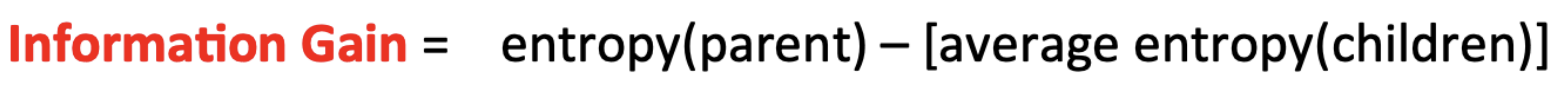



In [14]:
# Get the entropy of the root node
root_node_entropy = dt_classifier.tree_.impurity[0]

# Get the entropy of the left child node
left_child_entropy = dt_classifier.tree_.impurity[dt_classifier.tree_.children_left[0]]
# Get the entropy of the right child node
right_child_entropy = dt_classifier.tree_.impurity[dt_classifier.tree_.children_right[0]]

# Calculate the average entropy of the child nodes
left_children_size = dt_classifier.tree_.n_node_samples[dt_classifier.tree_.children_left[0]]
right_children_size = dt_classifier.tree_.n_node_samples[dt_classifier.tree_.children_right[0]]
children_size = left_children_size + right_children_size
children_entropy = (left_children_size / children_size) * left_child_entropy + (right_children_size / children_size) * right_child_entropy

# Calculate the information gain
information_gain = root_node_entropy - children_entropy

print("Information gain: ", information_gain)

Information gain:  0.2992178987277314
